# Black Friday Sales Prediction

## Data Overview

Dataset has 550068 rows (transactions) and 12 columns (features) as described below:

   - **User_ID**: Identity Number of a User. There are a total of 5891 users in the dataset.
   - **Product_ID**: Identity Number of a Product. There are a total of 3623 products in the dataset.
   - **Gender**: Gender of User (M/F).
   - **Age**: Age of the User (in bins).
   - **Occupation**: Occupation Number, already labeled with numbers 0 to 20.
   - **City_Category**: City of a User. Cities are categorized into 3 different categories 'A', 'B' and 'C'.
   - **Stay_In_Current_City_Years**: Number of Years the User has Stayed in their City.
   - **Marital_Status**: is 0 if the user is not married and 1 otherwise.
   - **Product_Category_1 to_3**: Category of the product. All 3 are already labaled with numbers.
   - **Purchase**: Purchase amount.(Target variable)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataframe = pd.read_csv("blackFriday.csv")
data = dataframe.copy()

In [3]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


   - Total samples in our datset are 550068 
   - This dataset has 12 features
   - Only Product Category 2 and 3 have missing values 
   - There are 2 features of float type, 5 features of int type, 5 features of object type(String)
   - Stay_In_Current_City_Years is a number but the type it is showing is object(String) 
   - Age in dataset is Object(String)
   - Product category 2,3 are shown float 

In [5]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


Mean of marital status is ~0.4 meaning majority of users are unmarried.  
The maximum Purchase is of $23961

In [6]:
data.describe(include=["O"])

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


  -  Product P00265242 is the most popular product.
  -  Most of the transactions were made by men.
  -  Age group with most transactions was 26-35.
  -  City Category with most transactions was B

In [7]:
col = list(data.columns)
print("Unique Values in each column:\n")
for c in col:
    print(c, ": ", data[c].unique())
    print()

Unique Values in each column:

User_ID :  [1000001 1000002 1000003 ... 1004113 1005391 1001529]

Product_ID :  ['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']

Gender :  ['F' 'M']

Age :  ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']

Occupation :  [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]

City_Category :  ['A' 'C' 'B']

Stay_In_Current_City_Years :  ['2' '4+' '3' '1' '0']

Marital_Status :  [0 1]

Product_Category_1 :  [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]

Product_Category_2 :  [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]

Product_Category_3 :  [nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]

Purchase :  [ 8370 15200  1422 ...   135   123   613]



In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


#### Incorrect Datatypes

In [9]:
data.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

#### Duplicate Values

In [10]:
data.duplicated().sum()

0

## Feature Analysis

### Purchase

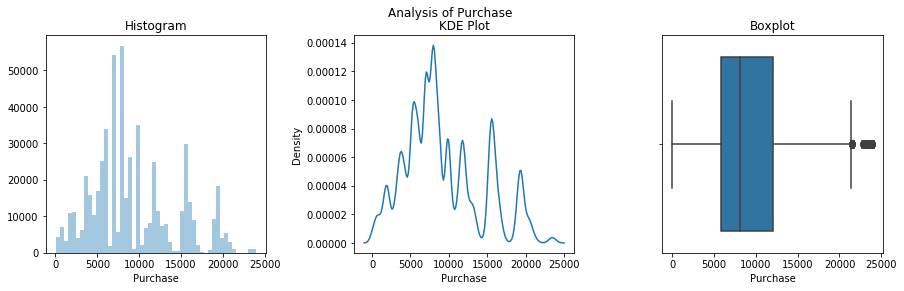

In [11]:
plt.figure(figsize=(15,4))
plt.suptitle('Analysis of Purchase')
plt.subplots_adjust(wspace=0.4,hspace=0.4)

#histogram
plt.subplot(131)
sns.distplot(data["Purchase"], kde=False)
plt.title("Histogram")

#kde
plt.subplot(132)
sns.kdeplot(x=data["Purchase"])
plt.title("KDE Plot")

#boxplot
plt.subplot(133)
sns.boxplot(x=data["Purchase"])
plt.title("Boxplot")

plt.show()

### Analysis of Purchase with Features

In [12]:
def Analysis(feature): 
    fig,axes = plt.subplots(2,2,figsize=(15,12))
    fig.suptitle('Analysis of Purchase with ' + feature)
    plt.subplots_adjust(wspace=0.4,hspace=0.4)
    sns.set_style('darkgrid')

    
    for i in data[feature].unique():
        
        #histogram
        sns.distplot(a=data.loc[data[feature]==i]['Purchase'],ax = axes[0][0],label=i, kde=False)
        
        #kde_plot
        sns.kdeplot(data=data.loc[data[feature]==i]['Purchase'],ax = axes[0][1],label=i)
               
        
    axes[0][0].set_title('Histogram')
    axes[0][1].set_title('KDE plot')
    axes[0][1].legend() 
    
    #piechart
    temp_df = data.groupby([feature]).sum().reset_index().sort_values('Purchase',ascending=False)
    colors = sns.color_palette("flare")
    axes[1][0].pie(temp_df['Purchase'], labels = temp_df[feature], colors = colors, autopct='%.0f%%')
    axes[1][0].set_title('Percentage of Purchases by ' + feature)


    #boxplot
    sns.boxplot(y=data['Purchase'],x=data[feature],palette="flare",ax=axes[1][1])
    axes[1][1].set_title('Box plot of Purchase by '+  feature)

plt.show()

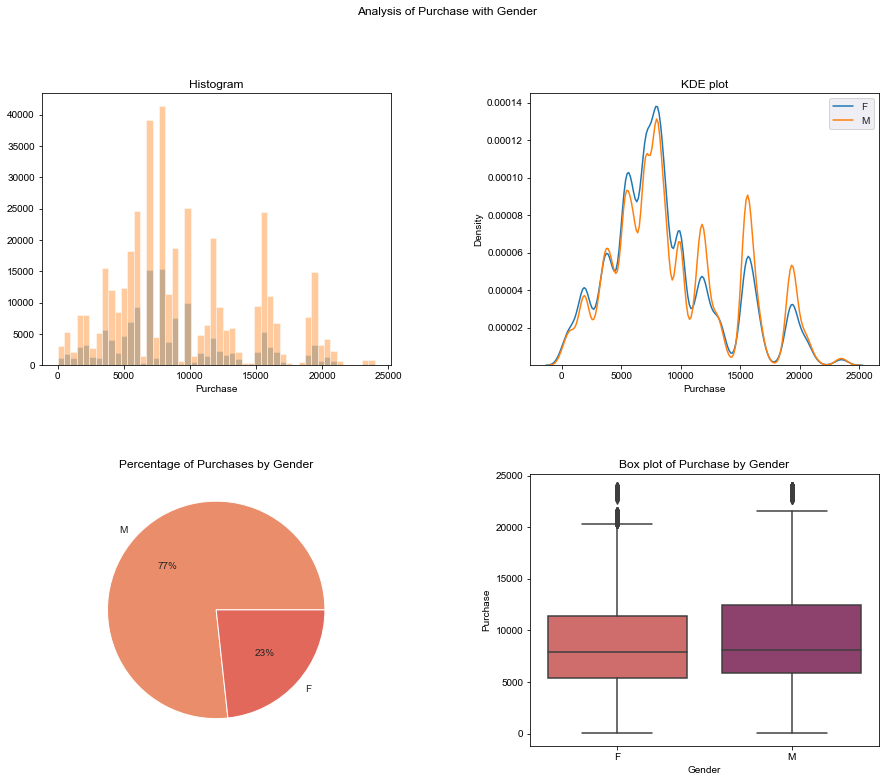

In [13]:
Analysis("Gender")

- Average male purchase is higher than that of female  
- ~75% of users are male  
- The purchase density of Male and Female is almost overlapping

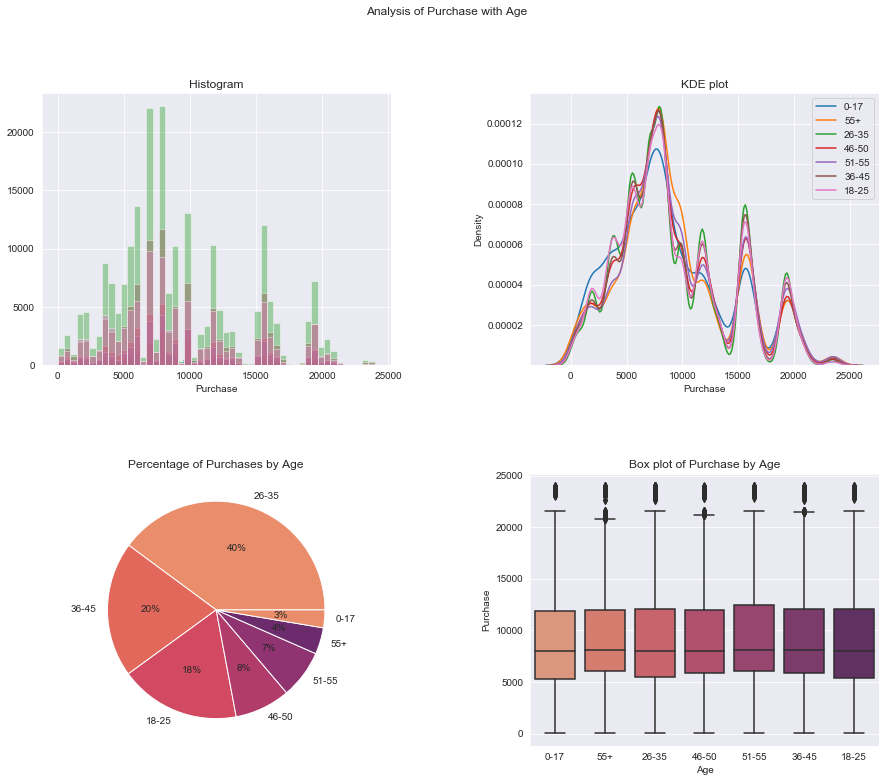

In [14]:
Analysis("Age")

- Mean of average purchase across all age groups is almost the same.  
- 40% of total purchases are made by 26-35 age group, this is because there are more number of users in this category!

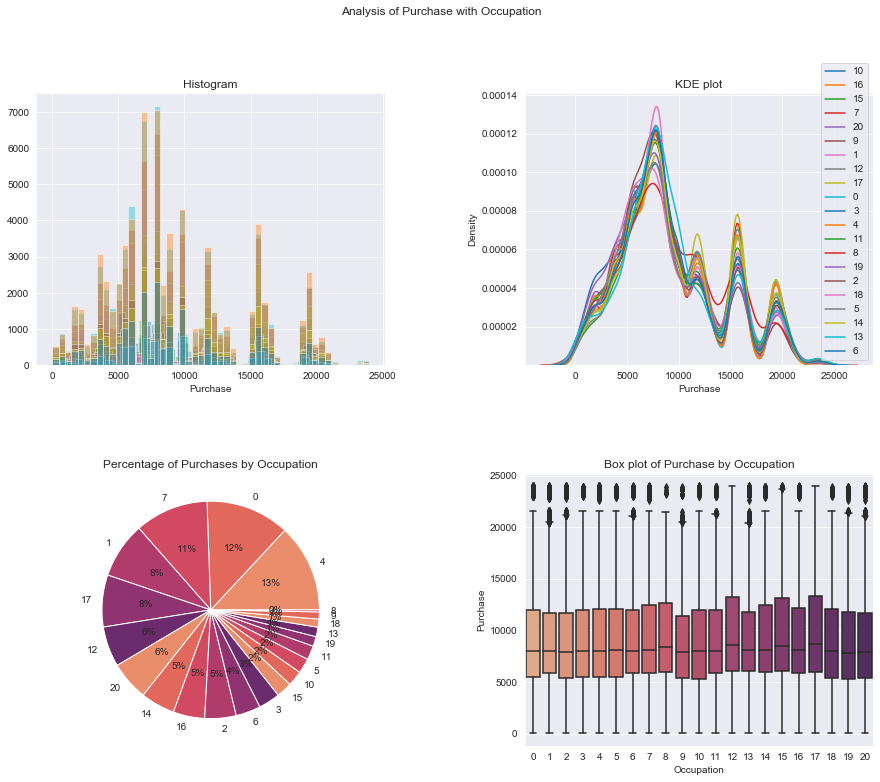

In [15]:
Analysis("Occupation")

- The mean of all values is almost the same. Despite that, the total purchases are very different because of different number of occurances in the dataset.  
- The distribution across different occupations is also the same as seen in boxplot

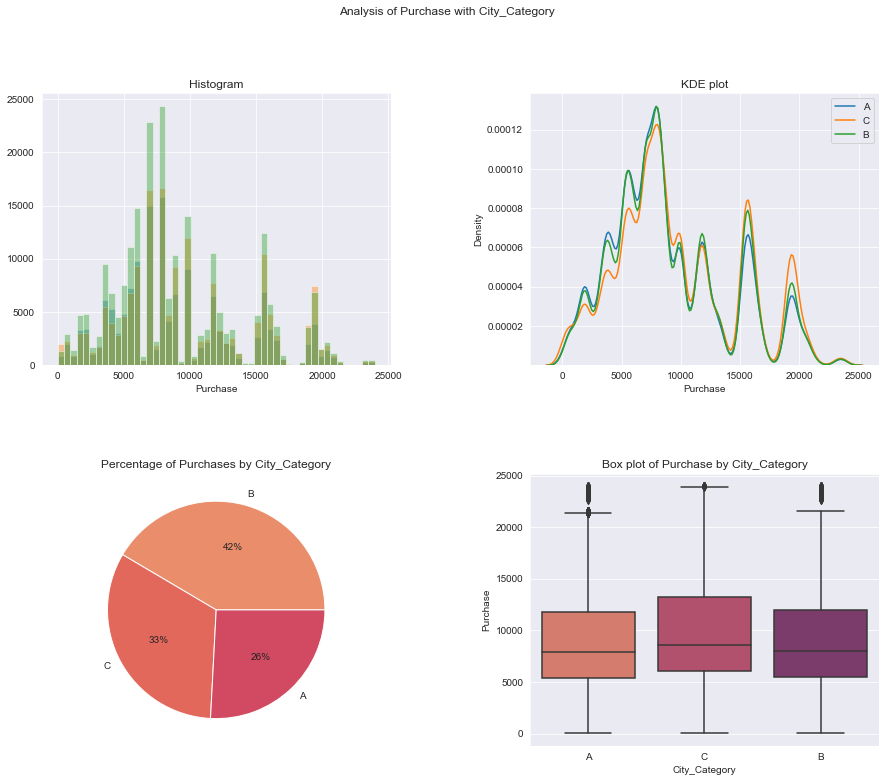

In [16]:
Analysis("City_Category")

- Mean purchase is different for each category  
- The city wise distribution is almost the same as seen in piechart

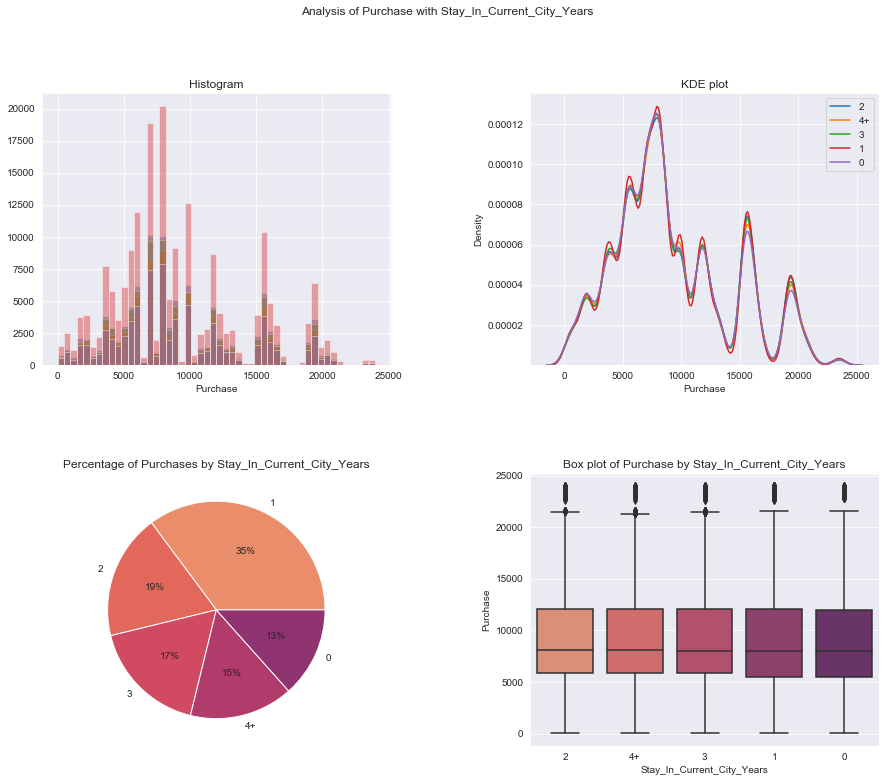

In [17]:
Analysis("Stay_In_Current_City_Years")

There is no variation in mean or median of purchase for this feature, also its correlation is very less.

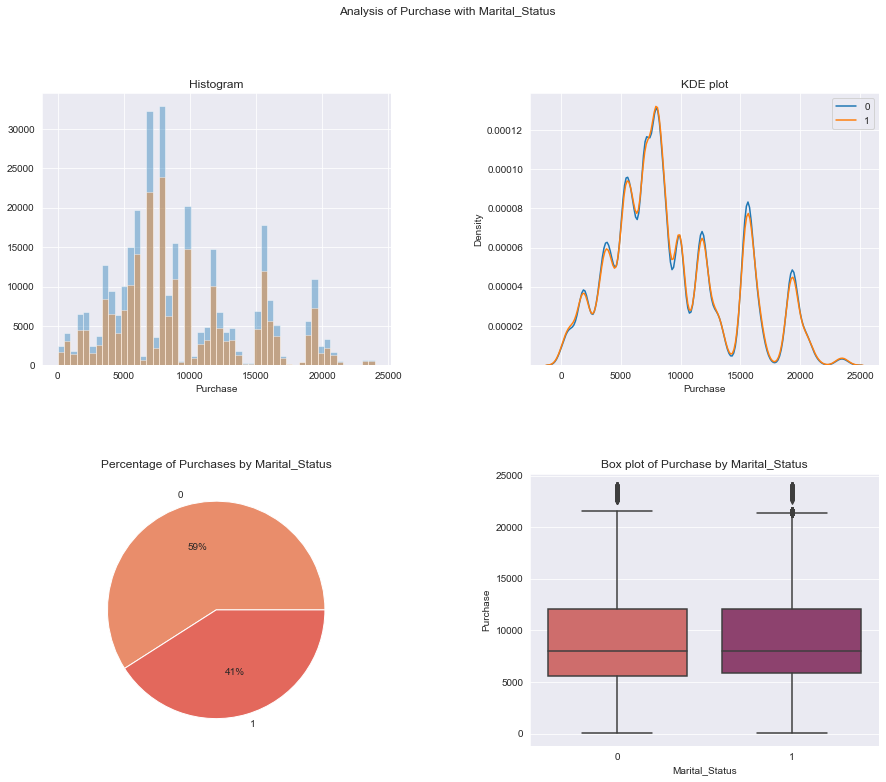

In [18]:
Analysis("Marital_Status")

The mean and meadian for both values for this feature is almost same and there is little to no correlation between it and purchase.

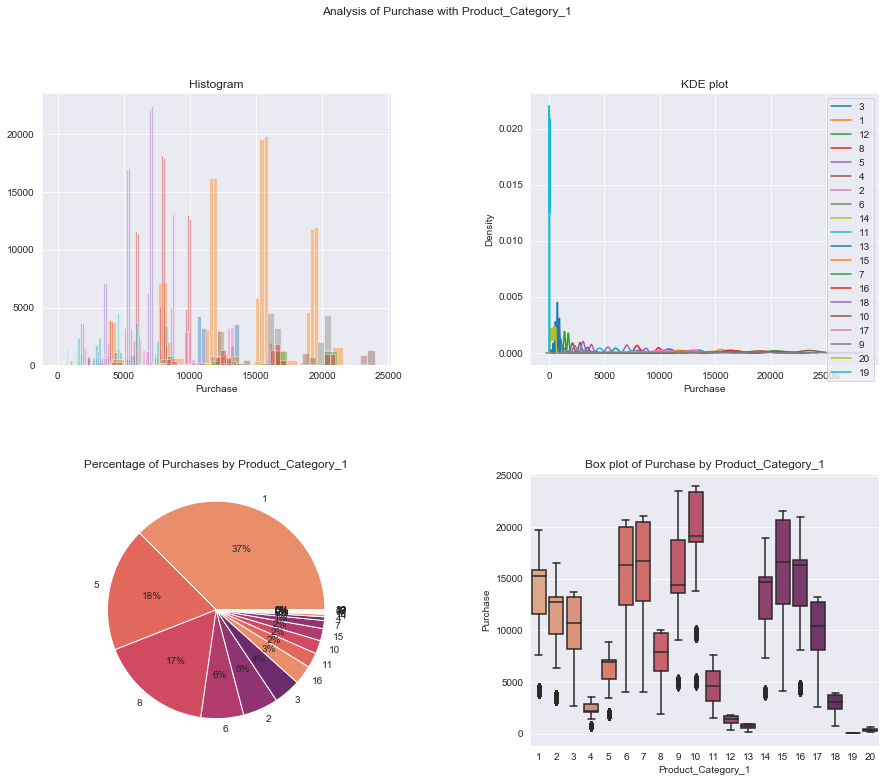

In [19]:
Analysis("Product_Category_1")



- From Barplot - Sum, we can see that product #1 has the most purchases.  
- Product #19 , #20 and #13 has almost no purchases, we can see that from all the plots above.  
- Product category #10 has the highest mean, but it accounts for the small fraction of total sum of purchases.  

There is a a lot of variation in Purchase Mean for each value in this feature


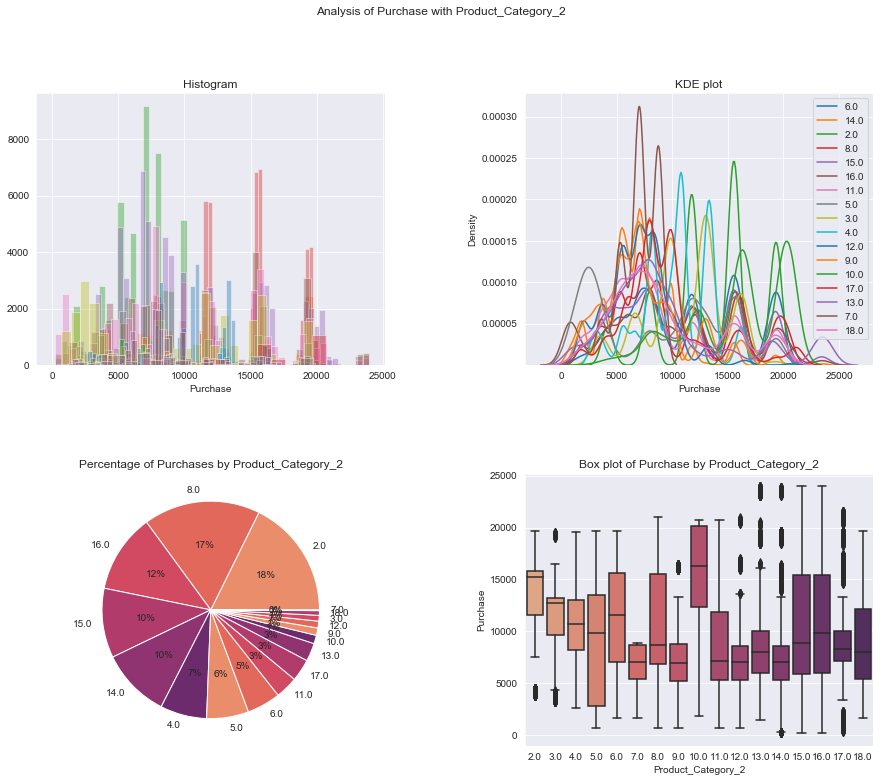

In [20]:
Analysis("Product_Category_2")

- There is no #1 in Product Category 2 as expected  
- #2 and #8 have highest total purchases  
- #10 has highest mean  
- There are many outliers as seen in the boxplots.  
- The purchase means of each value in this category are different  

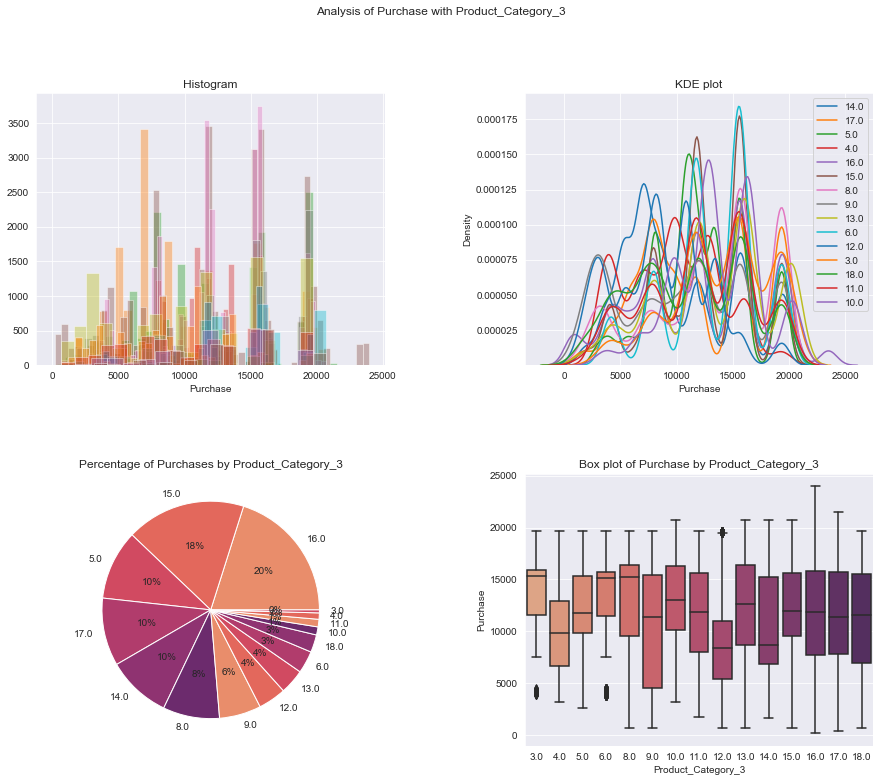

In [21]:
Analysis("Product_Category_3")

- #16 has highest total purchases.   
- The mean of all the products are almost similar.  
- #14, #15. #16, #17 account for more than 50% of the total purchases.  

### Analysis of Features with Each other

### Gender

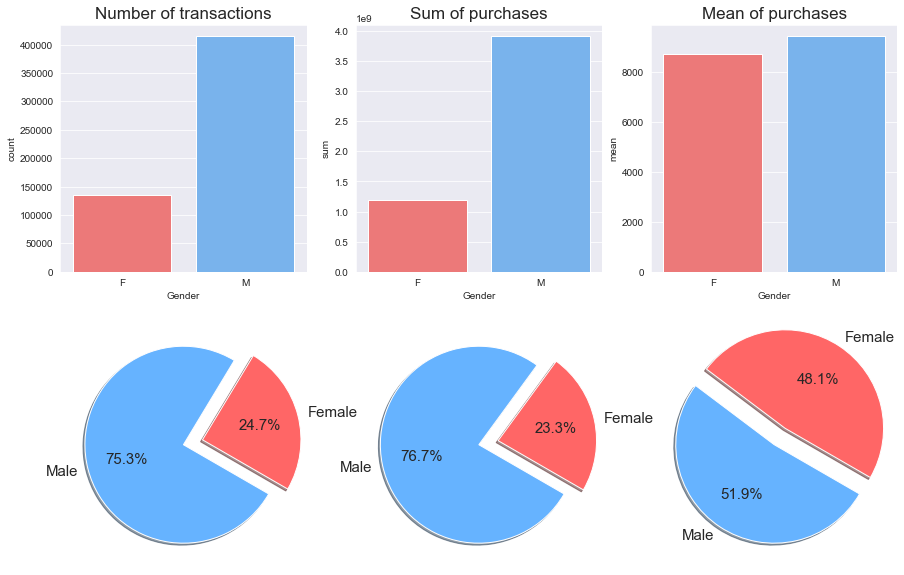

In [22]:
#which gender have high visiting rate to the retail store?
plt.figure(figsize=(15, 10))

m_purchase = data.groupby(['Gender'])['Purchase'].agg(['count', 'sum','mean'])

params1 = {
    'colors': [(255/255, 102/255, 102/255, 1), (102/255, 179/255, 1, 1)],
    'labels': m_purchase.index.map({'M': 'Male', 'F': 'Female'}),
    'autopct': '%1.1f%%',
    'startangle': -30, 
    'textprops': {'fontsize': 15},
    'explode': (0.2, 0),
    'shadow': True }

params2 = {
    'palette': [(255/255, 102/255, 102/255, 1), (102/255, 179/255, 1, 1)] }


plt.subplot(231)
sns.barplot(m_purchase.index, m_purchase['count'], **params2)
plt.title('Number of transactions', size=17)

plt.subplot(232)
sns.barplot(m_purchase.index, m_purchase['sum'], **params2)
plt.title('Sum of purchases', size=17)

plt.subplot(233)
sns.barplot(m_purchase.index, m_purchase['mean'], **params2) 
plt.title('Mean of purchases',  size=17)

plt.subplot(234)
plt.pie(m_purchase['count'], **params1)

plt.subplot(235)
plt.pie(m_purchase['sum'], **params1)

plt.subplot(236)
plt.pie(m_purchase['mean'], **params1)

plt.show()

Approximately, 75% of the number of purchases are made by Male users and rest of the 25% is done by female users. This tells us the Male consumers are the major contributors to the number of sales.On average the male gender spends more money on purchase contrary to female, and it is possible to also observe this trend by looking the total value of purchase.

### Age

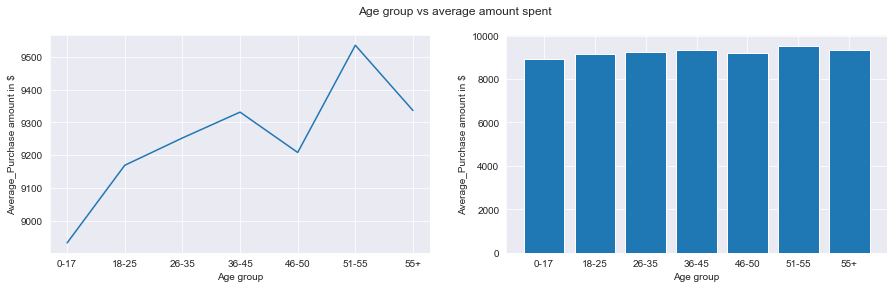

In [23]:
#which age group of customers are more likely to purchase with More amount per person?

df = data.groupby('Age')['Purchase'].mean()
df  = pd.DataFrame({'Age':df.index, 'Average_purchase':df.values})

plt.subplots(1,2,figsize=(15,4))
plt.suptitle('Age group vs average amount spent');

plt.subplot(121)
plt.plot('Age','Average_purchase',data = df);
plt.xlabel('Age group');
plt.ylabel('Average_Purchase amount in $');

plt.subplot(122)
plt.bar(x='Age',height='Average_purchase',data=df);
plt.xlabel('Age group');
plt.ylabel('Average_Purchase amount in $');

People of Age group 51-55 have spent more on purchase. Approximately 9600$ on average spent by People between age 51-55.

In [24]:
def PieDraw(feature):

    data_count = data.groupby(feature)[feature].count()
    data_count = pd.DataFrame({feature:data_count.index, 'Count':data_count.values})

    data_mean =data.groupby(feature)['Purchase'].mean()
    data_mean = pd.DataFrame({feature:data_mean.index, 'Mean':data_mean.values})

    data_sum =data.groupby(feature)['Purchase'].sum()
    data_sum = pd.DataFrame({feature:data_sum.index, 'Sum':data_sum.values})

    plt.figure(figsize = (16,6))
    plt.subplot(131)
    colors = sns.color_palette("Set3")
    plt.pie(data_count['Count'],labels = data_count[feature],autopct='%1.1f%%',shadow=True, colors=colors);
    plt.title(f'{feature} split in data');

    plt.subplot(132)
    plt.pie(data_mean['Mean'],labels = data_mean[feature],autopct='%1.1f%%',shadow=True, colors=colors);
    plt.title('Average Purchase');

    plt.subplot(133)
    plt.pie(data_sum['Sum'],labels = data_sum[feature],autopct='%1.1f%%',shadow=True, colors=colors);
    plt.title('Sum Purchase');
    
    plt.show()

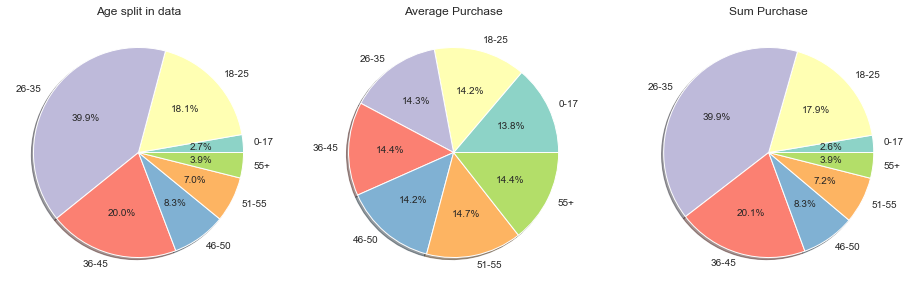

In [25]:
#which age group have high visiting rate to the retail store?
PieDraw("Age")

Now to the first Pie this will give intresting understanding when we comapre it with first question solution.

This shows 40% of customers are 26-35 age group and 20% are from 36-45 => 60% of customers from 26-45 age group.
only 7% of customers are of 51-55 Age group.

We can tell 60% of customers from 26-45 who have a medium purchase rate. 7% of customers are from 51-55 who have high purchase rate. This Gives an intresting insight on sales to store owners.

### City Category

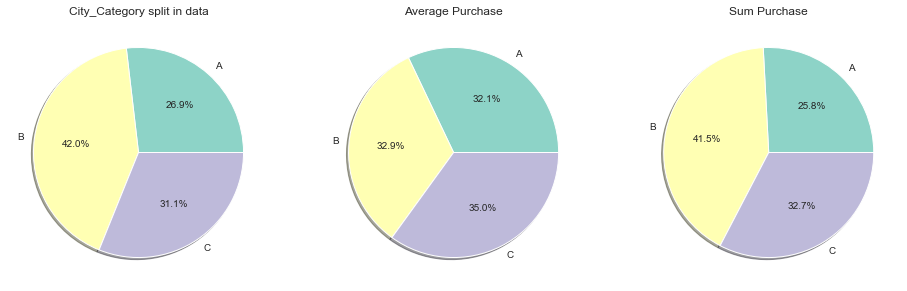

In [26]:
PieDraw("City_Category")

Unexpectedly, the highest sales do not come in the number of purchases, people from Area B have a greater purchasing power than others, and greater sales gained from people from Area C.

### Stay In Current City Years

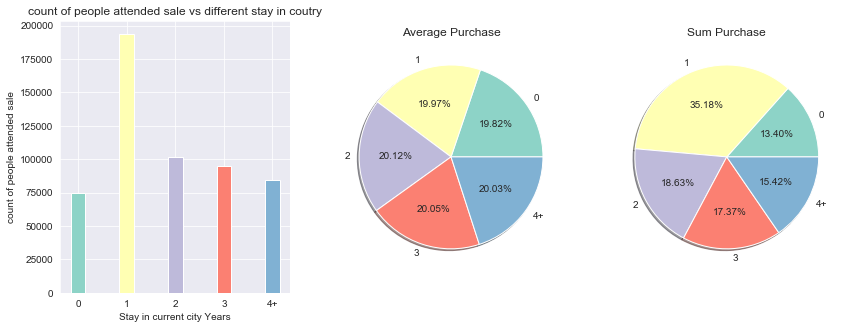

In [27]:
#who has high purchase rate newly settled or people staying from long time?
plt.figure(figsize=(14,5))

plt.subplot(131)
df = data.groupby("Stay_In_Current_City_Years")["Stay_In_Current_City_Years"].count()
colors = sns.color_palette("Set3")
plt.bar(df.index,df.values,width=0.3,color = colors);
plt.xlabel('Stay in current city Years');
plt.ylabel('count of people attended sale');
plt.title('count of people attended sale vs different stay in coutry');

plt.subplot(132)
data_Stay_mean =data.groupby('Stay_In_Current_City_Years')['Purchase'].mean()
plt.pie(data_Stay_mean.values,labels = data_Stay_mean.index,autopct='%1.2f%%',shadow=True, colors=colors);
plt.title('Average Purchase');

plt.subplot(133)
data_Stay_sum =data.groupby('Stay_In_Current_City_Years')['Purchase'].sum()
plt.pie(data_Stay_sum.values,labels = data_Stay_sum.index,autopct='%1.2f%%',shadow=True, colors=colors);
plt.title('Sum Purchase');

People who are 2 years residents spent more on average in the sale.Even though the 1 year reisdents visited more in sale they have not spent much.

### Product Category

In [28]:
def Category(feature):
    cat1 = data.groupby([feature])['Purchase'].count().reset_index()
    cat2 = data.groupby([feature])['Purchase'].sum().reset_index()
    cat3 = data.groupby([feature])['Purchase'].mean().reset_index()

    plt.subplots(figsize=(12,15))

    plt.subplot(311)
    plt.title('Count')
    sns.barplot(x=feature, y='Purchase',data=cat1)

    plt.subplot(312)
    plt.title('Sum')
    sns.barplot(x=feature, y='Purchase',data=cat2)

    plt.subplot(313)
    plt.title('Mean')
    sns.barplot(x=feature, y='Purchase',data=cat3);

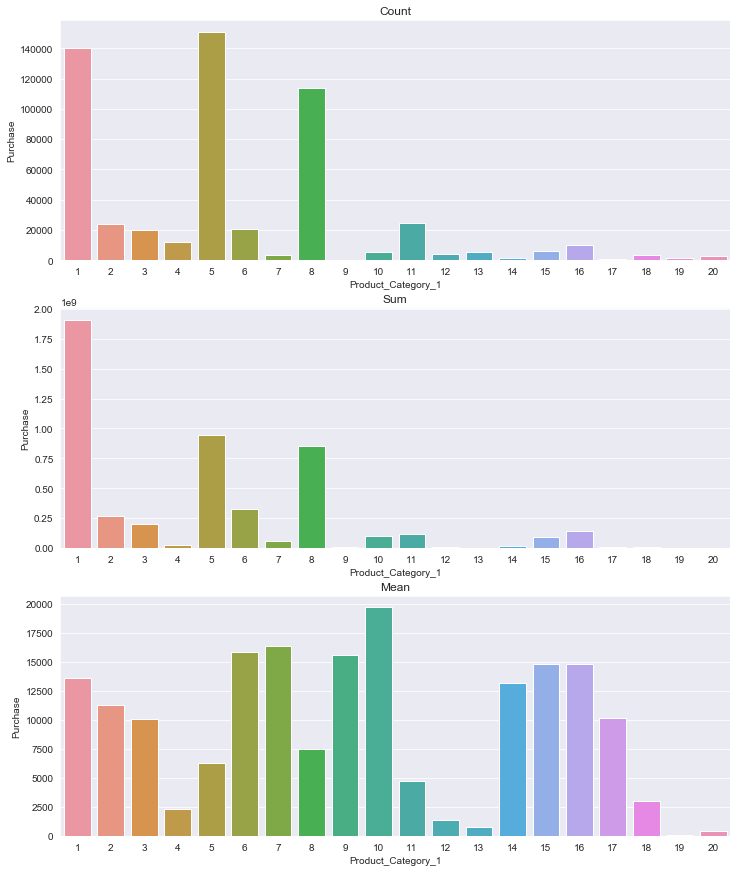

In [29]:
Category("Product_Category_1")

Product 1 generated the maximum revenue as seen in above bar chart 

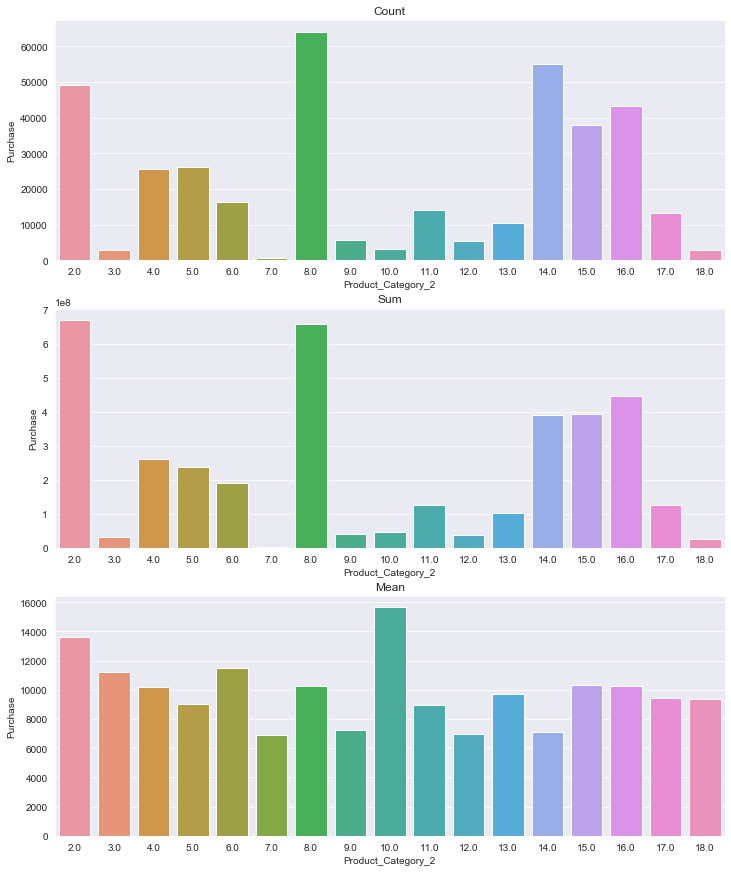

In [30]:
Category("Product_Category_2")

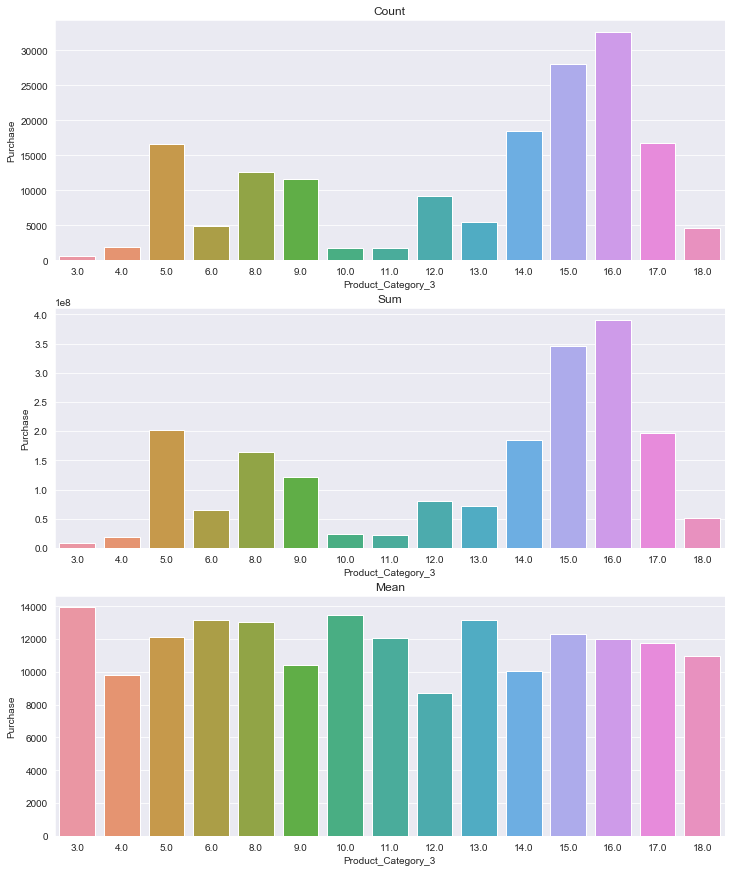

In [31]:
Category("Product_Category_3")

In [32]:
#Which type of products are common among men and which among women?

def Category_Gender(feature):
    plt.figure(figsize = (16,10))
    plt.subplot(211)
    a = data.groupby([feature,'Gender'])['Purchase'].sum().reset_index()
    plt.title("Total money spent for each product category by gender")
    sns.barplot(x=a[feature], y=a['Purchase'], hue = a['Gender']);

    plt.subplot(212)
    b = data.groupby([feature,'Gender'])['Purchase'].mean().reset_index()
    plt.title("Average money spent for each product category by gender")
    sns.barplot(x=b[feature], y=b['Purchase'], hue = b['Gender']);

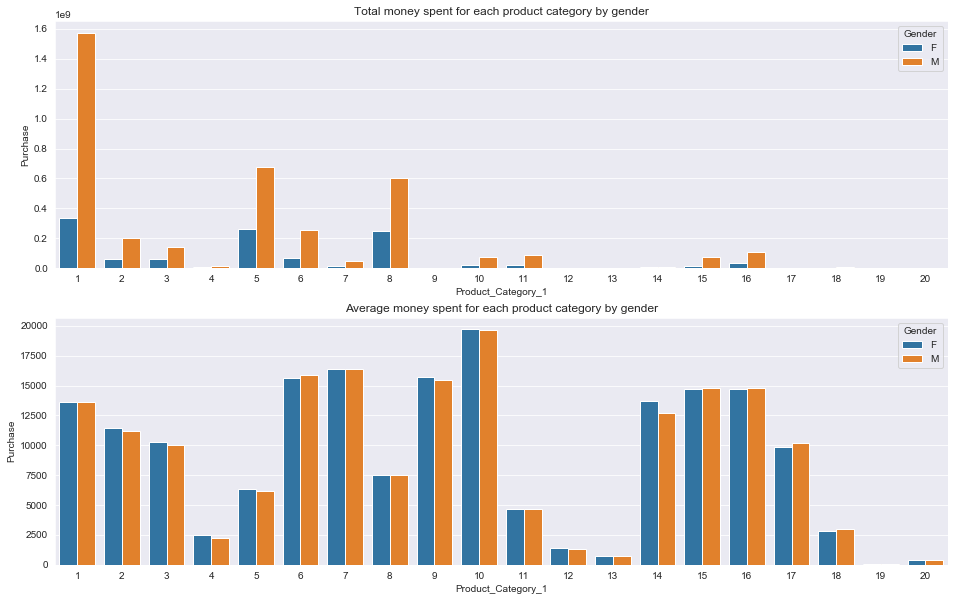

In [33]:
Category_Gender("Product_Category_1")

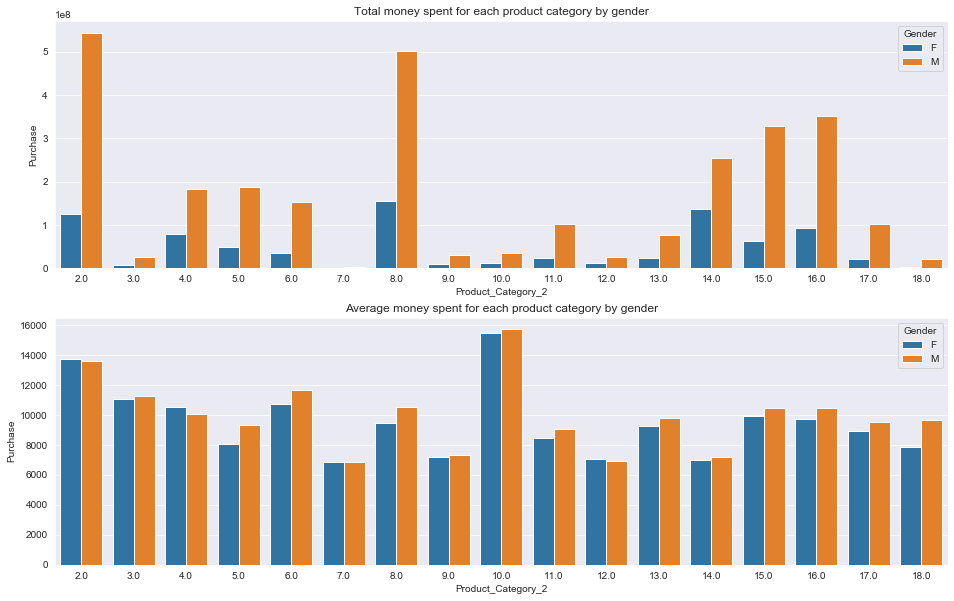

In [34]:
Category_Gender("Product_Category_2")

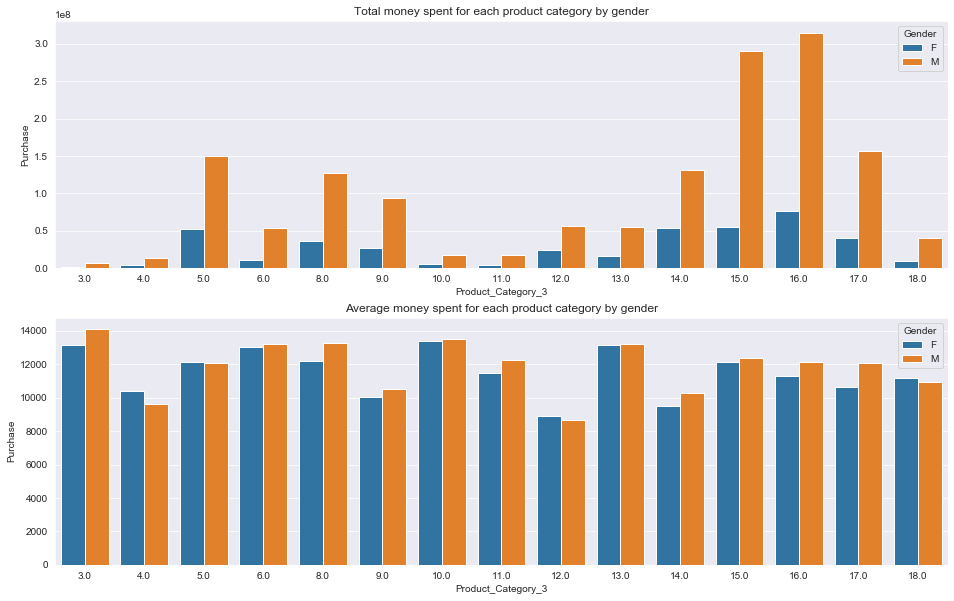

In [35]:
Category_Gender("Product_Category_3")

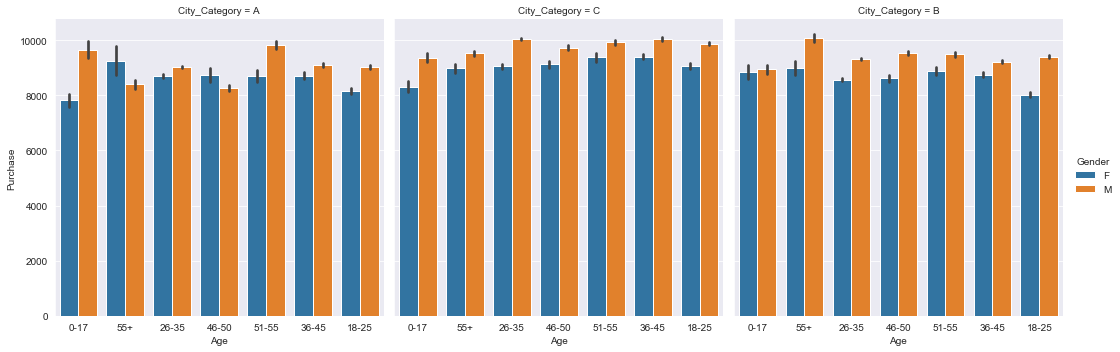

In [36]:
sns.catplot(x="Age", y="Purchase",hue="Gender", col="City_Category",data=data, kind="bar");

### Products ID

In [37]:
#Which product is popular for each age group?
popular_product = data.groupby('Age')['Product_ID'].apply(lambda x: x.value_counts().index[0]).reset_index()
popular_product

,Age,Product_ID
0,0-17,P00255842
1,18-25,P00265242
2,26-35,P00265242
3,36-45,P00025442
4,46-50,P00265242
5,51-55,P00265242
6,55+,P00265242


The product P00265242 has attracted most age groups. From 18-35,46-55+ all of them have this product has highest purchased in their age group. For Age group 0-17 P00255842 is more frequently purchased and for 36-45 P00025442 is most frequently purchased.

In [38]:
#Top 10 products which made highest sales in the store?
df1 = data.groupby("Product_ID")["Purchase"].apply(lambda x: x.sum()).reset_index().sort_values(by="Purchase",ascending=False)
df1[:10]

,Product_ID,Purchase
249,P00025442,27995166
1016,P00110742,26722309
2443,P00255842,25168963
582,P00059442,24338343
1745,P00184942,24334887
1030,P00112142,24216006
1018,P00110942,23639564
2263,P00237542,23425576
565,P00057642,23102780
104,P00010742,22164153


In [39]:
def Best_Product(feature):
    import random
    color_mapping = {}
    def random_color(val):    
        if val in color_mapping.keys():
            color = color_mapping[val]
        else:
            r = lambda: random.randint(0,255)
            color = 'rgba({}, {}, {}, 0.4)'.format(r(), r(), r())
            color_mapping[val] = color
        return 'background-color: %s' % color

    product_gb = data[[feature, 'Product_ID', 'Purchase']].groupby([feature, 'Product_ID']).agg('count').rename(columns={'Purchase': 'count'})
    product_gb.sort_values('count', inplace=True, ascending=False)
    y = sorted(data[feature].unique())
    result = pd.DataFrame({
        x: list(product_gb.loc[x].index)[:5] for x in y
    }, index=['#{}'.format(x) for x in range(1,6)])
    display(result.style.applymap(random_color)) 

In [40]:
liste = ["Gender","Age","City_Category","Marital_Status"]

for i in liste:
    Best_Product(i)

,F,M
#1,P00265242,P00265242
#2,P00220442,P00025442
#3,P00058042,P00110742
#4,P00255842,P00112142
#5,P00110742,P00057642


,0-17,18-25,26-35,36-45,46-50,51-55,55+
#1,P00255842,P00265242,P00265242,P00025442,P00265242,P00265242,P00265242
#2,P00145042,P00112142,P00110742,P00265242,P00046742,P00025442,P00080342
#3,P00112142,P00110742,P00025442,P00110742,P00025442,P00110742,P00051442
#4,P00034742,P00237542,P00112142,P00112142,P00051442,P00059442,P00184942
#5,P00242742,P00046742,P00057642,P00057642,P00117942,P00010742,P00025442


,A,B,C
#1,P00265242,P00265242,P00265242
#2,P00110742,P00110742,P00025442
#3,P00025442,P00025442,P00112142
#4,P00278642,P00112142,P00110742
#5,P00057642,P00058042,P00184942


,0,1
#1,P00265242,P00265242
#2,P00110742,P00025442
#3,P00025442,P00110742
#4,P00112142,P00112142
#5,P00057642,P00184942


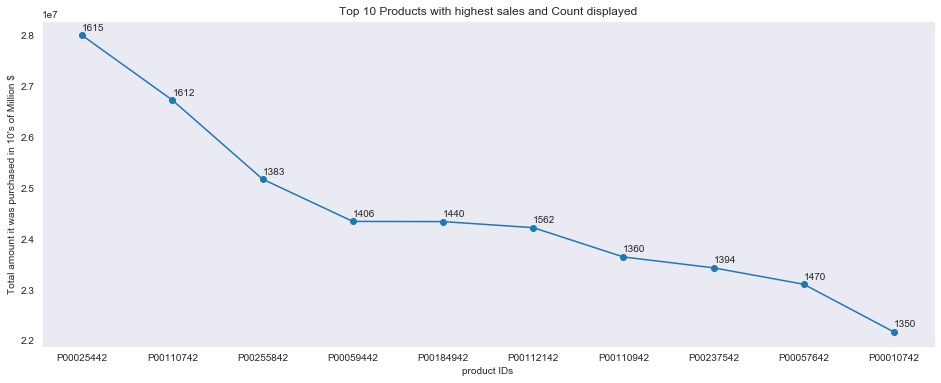

In [41]:
data1 = data.groupby('Product_ID').agg({'Purchase':'sum'}).reset_index()
data2 = data['Product_ID'].value_counts()
data2 = pd.DataFrame({'Product_ID':data2.index, 'Count':data2.values})
df = pd.merge(data1,data2,left_on='Product_ID',right_on='Product_ID',how = 'left');

df = df.sort_values(['Purchase'],ascending=False)[0:10];

plt.figure(figsize=(16,6));
plt.grid();
plt.plot(df['Product_ID'],df['Purchase'],'o-');
plt.xlabel('product IDs');
plt.ylabel('Total amount it was purchased in 10\'s of Million $');
plt.title('Top 10 Products with highest sales and Count displayed');
for a,b,c in zip(df['Product_ID'], df['Purchase'], df['Count']): 
    plt.text(a, b+100000, str(c))  
plt.show();

We can see 10 products their purchase amount and count of products saled.1st product has 1615 pieces sold with total sale of 28 million and 2nd product with 1612 pieces sold but with 26.5 million. which means 1st product might have higher product cost. 3rd product has 1383 units sold and 4th product has 1406 units sold but 4th product has low price than 3rd product so even it has higher products sold it has lesser sale amount than 3rd.

### Occupation

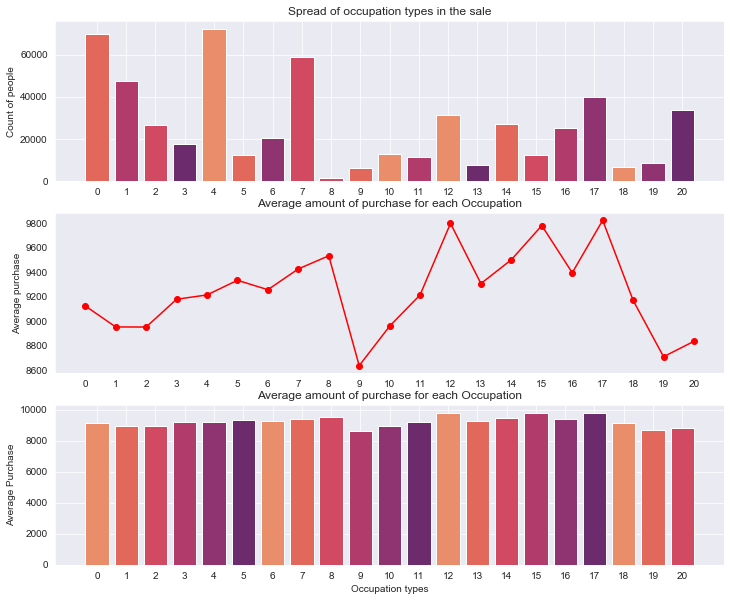

In [42]:
#which occupation type have high purchase rate?
plt.figure(figsize = (12,10))

plt.subplot(311)
data_occup = data['Occupation'].value_counts();
colors = sns.color_palette("flare")
plt.bar(data_occup.index,data_occup.values,color =colors);
plt.xticks(data_occup.index);
plt.ylabel('Count of people');
plt.title('Spread of occupation types in the sale');

plt.subplot(312)
data_occup = data.groupby('Occupation')['Purchase'].mean();
plt.grid();
plt.plot(data_occup.index,data_occup.values,'ro-');
plt.ylabel('Average purchase');
plt.title('Average amount of purchase for each Occupation');
plt.xticks(data_occup.index);

plt.subplot(313)
data_occup = data.groupby('Occupation')['Purchase'].mean();
plt.bar(data_occup.index,data_occup.values,color =colors);
plt.xticks(data_occup.index)
plt.xlabel('Occupation types');
plt.ylabel('Average Purchase');
plt.title('Average amount of purchase for each Occupation');



There are few points to observe from these plots

   1. Occupation type 12,15,17 have high purchase rates but no of people with those occupations are not in large amount.
   2. Occupations 0,4 and 7 have higghest amount of people but their average amount of purchases are less.
   3. If we observe occupation 8 and 9 no of people in 8 and lesser than in 9 but the average spending of occupation 8 is roughly 800 dollars more than occupation 9.
   4. If we observe 11 adn 12 total people and average spending both are more for 12. So no of people is not correlated with purchase.
   5. Occupation 8 which doesnot even have 10,000 no of people have average spending just 300 dollars less than occupation 17 with 40,000 people. So occupation 8 looks like heavy spenders.
   6. occupation 4 which has highest amount of people has spending 600 dollars less than the highest Spender.
   7. occuption 1 has 20,000 more people than occupation 2 but they seem to have roughly same amount of spending.



In [43]:
import random
color_mapping = {}
def random_color(val):    
    if val in color_mapping.keys():
        color = color_mapping[val]
    else:
        r = lambda: random.randint(0,255)
        color = 'rgba({}, {}, {}, 0.4)'.format(r(), r(), r())
        color_mapping[val] = color
    return 'background-color: %s' % color

occ_product_gb = data[['Occupation', 'Product_ID', 'Purchase']].groupby(['Occupation', 'Product_ID']).agg('count').rename(columns={'Purchase': 'count'})
occ_product_gb.sort_values('count', inplace=True, ascending=False)
result = pd.DataFrame({
    x: list(occ_product_gb.loc[x].index)[:5] for x in range(21)
}, index=['#{}'.format(x) for x in range(1,6)])
display(result.style.applymap(random_color))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
#1,P00265242,P00265242,P00265242,P00265242,P00265242,P00265242,P00265242,P00265242,P00112142,P00034742,P00145042,P00265242,P00057642,P00265242,P00265242,P00025442,P00265242,P00057642,P00265242,P00265242,P00265242
#2,P00110742,P00220442,P00025442,P00117942,P00110742,P00114942,P00110742,P00110742,P00242742,P00265242,P00242742,P00025442,P00265242,P00010742,P00184942,P00110742,P00046742,P00025442,P00010742,P00237542,P00059442
#3,P00025442,P00110742,P00058042,P00025442,P00112142,P00251242,P00058042,P00025442,P00052842,P00117442,P00112142,P00059442,P00112142,P00317842,P00025442,P00265242,P00255842,P00112142,P00080342,P00058042,P00220442
#4,P00057642,P00031042,P00110842,P00110842,P00237542,P00112542,P00031042,P00112142,P00114942,P00000142,P00025442,P00117942,P00025442,P00080342,P00237542,P00059442,P00110742,P00110742,P00058042,P00112142,P00110742
#5,P00112142,P00046742,P00059442,P00110742,P00025442,P00110742,P00255842,P00110942,P00127842,P00102642,P00255842,P00031042,P00242742,P00085242,P00110742,P00112142,P00034742,P00237542,P00057642,P00059442,P00025442




Table above represents top 5 seller products categorized by the user occupation (same products have the same background color).

  1. First thing you notice is that P00265242 is the most-purchased product for 15 out of 21 occupations and an interesting fact is that this product is not even present in top-5 products of occupations 8, 10 and 17. I wonder what this product is and what these occupations are.
  2.  Second interesting thing about this illustration is how similar the first 4 occupations' top-5 are.
  3. Third and last interesting fact from these charts: from top 5 products of occupation 9, one of them is P00265242 and present in most of other top 5s, one of them is only present in occupation 16's list and the rest are not repeated in any other lists. Adding to account the fact that we saw from previous chart, this was the only occupation with more women than men (even though the totall number of men in dataset was higher), makes occupation 9 a unique occupation among the list.



### Marital Status

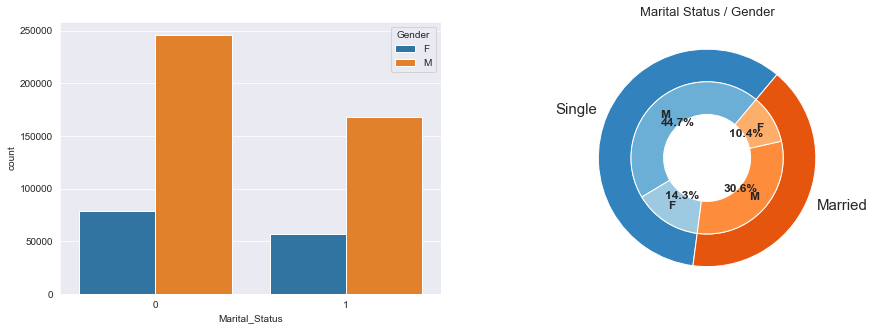

In [44]:
#Based on marital status and gender who has high purchase rate?
plt.figure(figsize = (15,5))

plt.subplot(122)
out_vals = data.Marital_Status.value_counts()
in_vals = np.array([data[data.Marital_Status==x]['Gender'].value_counts() for x in [0,1]]).flatten()

size = 0.3
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(2)*4)
inner_colors = cmap(np.array([1, 2, 5, 6]))

plt.pie(out_vals, radius=1, colors=outer_colors,labels=['Single', 'Married'],
       wedgeprops=dict(width=size, edgecolor='w'), 
       textprops={'fontsize': 15}, startangle=50)

plt.pie(in_vals, radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels=['M', 'F', 'M', 'F'], autopct='%1.1f%%',
       labeldistance=0.75, textprops={'fontsize': 12, 'weight': 'bold'}, startangle=50)

plt.title('Marital Status / Gender', fontsize=13)

plt.subplot(121)
sns.countplot(data['Marital_Status'], hue=data['Gender'],);
plt.show()

Males tend to purchase more and Unmarried Males are around 45% in the data.

## 4. Conclusion

Findings

   
- People of Age group 51-55 have purchased with high amount per person (9600 dollars per person).
- 40% of total people visited were between Age 26-45.
- People from Age group 26-35 collectively have spent more amount.
- P00265242 was the product which attratcted most of the adults and P00255842 attracted 0-17 Age group.
- Unmarreid Male who are 45% in the dataset have spent 9453 dollars per person.
- Even though less no of customers are of Ocuupation 12,15,17 the spend more rougly 9800 dollars per person.
- Highest No of customers are from Occupation 0,4 and 7.
- High no of customers are of newly settled people but customers who are 2 years residents have spent 9320 dollars per person.
- Product P00025442 has got highest total sale amount of about 27.9 million but it is not the highest repeated product in sale P00265242 was highest repeated with 1880 times(1880 customers have bought this).
- 75% of the number of purchases are made by Male users and rest of the 25% is done by female users.
- People of City of C have purchased with high amount per person (9719 dollars per person)
- 42% of the number of purchases are made by living in City B users.

## Data Processing

### Dropping the irrelevant columns

In [45]:
data = data.drop(["User_ID","Product_ID"],axis=1)

#### Missing Data

In [46]:
missing_values=data.isnull().sum()
percent_missing = data.isnull().sum()/data.shape[0]*100

value = {
    'missing_values':missing_values,
    'percent_missing':percent_missing
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing
Gender,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
City_Category,0,0.000000
Stay_In_Current_City_Years,0,0.000000
Marital_Status,0,0.000000
Product_Category_1,0,0.000000
Product_Category_2,173638,31.566643
Product_Category_3,383247,69.672659
Purchase,0,0.000000


In [47]:
liste = ["Product_Category_1","Product_Category_2","Product_Category_3"]
for i in liste:
    print(i,":",np.sort(data[i].unique()))

Product_Category_1 : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Product_Category_2 : [ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. nan]
Product_Category_3 : [ 3.  4.  5.  6.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. nan]


We notice that 1,19,20 values are missing for category_2. Likewise, we see that 1,2,7,19,20 values for category_3 are missing. So we will randomly replace missing values with these values.

In [48]:
liste = ["Product_Category_2","Product_Category_3"]
mylist1 = [1,19,20]
mylist2 = [1,2,7,19,20]
import random
for i in liste:
    missing = data[[i]].isin(["NaN"])
    indeks = missing[missing[i]==True].index
    new = data.loc[indeks]
    if i=="Product_Category_2":
        new[i] = new[i].apply(lambda x:random.choice(mylist1))
        data = data.drop(index=indeks)
        data = pd.concat([data, new],ignore_index=True)
    else:
        new[i] = new[i].apply(lambda x:random.choice(mylist2))
        data = data.drop(index=indeks)
        data = pd.concat([data, new],ignore_index=True)

In [49]:
data["Product_Category_2"] = data["Product_Category_2"].astype('int64')
data["Product_Category_3"] = data["Product_Category_3"].astype('int64')

data["Age"] = (data["Age"].str.strip('+'))
data["Stay_In_Current_City_Years"] = (data["Stay_In_Current_City_Years"].str.strip('+'))

In [50]:
list_ = ["Gender","Age","City_Category","Stay_In_Current_City_Years","Marital_Status"]

for i in list_:
        data[i] = data[i].astype('category')

### Encoding

In [51]:
from sklearn import preprocessing

liste = ['Marital_Status','Gender','Age','City_Category','Stay_In_Current_City_Years']

label_encoder = preprocessing.LabelEncoder()

for i in liste :
    data[i] = label_encoder.fit_transform(data[i])

### Split Data

In [52]:
from sklearn.model_selection import train_test_split

X = data.drop("Purchase", axis=1)
y = data["Purchase"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### CV Function

In [53]:
from sklearn.model_selection import cross_validate

def CV(model):
    
    CV = cross_validate(model,X,y,scoring=('neg_root_mean_squared_error','r2'),cv=5)

    r2 = np.abs(np.mean(CV['test_r2']))
    rmse = np.abs(np.mean(CV['test_neg_root_mean_squared_error']))

    print("R2 score = " , r2)
    print("RMSE = " , rmse)

## Data Modeling

### Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg_model = reg.fit(X_train,y_train)

CV(reg_model)

R2 score =  0.01909329053857396
RMSE =  4784.349167950155


### Lasso

In [55]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso_model = lasso.fit(X_train,y_train)

CV(lasso_model)

R2 score =  0.019098292963511555
RMSE =  4784.379613972477


### Ridge

In [56]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge_model = ridge.fit(X_train,y_train)

CV(ridge_model)

R2 score =  0.019093283254012095
RMSE =  4784.349169844404


### ElasticNet

In [57]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet()
elastic_model = elastic.fit(X_train,y_train)

CV(elastic_model)

R2 score =  0.018925896461842284
RMSE =  4786.763538019999


### Decision Tree Regressor

In [58]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)
tree_model = regressor.fit(X_train,y_train)

CV(tree_model)

R2 score =  0.3862160153731313
RMSE =  3738.863346850519


### Random Forest Regressor

In [59]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(random_state=0)
randomForest_model = regr.fit(X_train,y_train)

CV(randomForest_model)

R2 score =  0.5721425997085833
RMSE =  3122.779333388701


### XGBoost

In [60]:
from xgboost import XGBRegressor

reg = XGBRegressor(verbosity = 0)
xgboost = reg.fit(X_train,y_train)

CV(xgboost)

R2 score =  0.6099240731762823
RMSE =  2982.1951217682094


In [61]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math

models = [reg_model,ridge_model,lasso_model,elastic_model,tree_model,randomForest_model,xgboost]

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = math.sqrt(mean_squared_error(y_test, y_pred))#burda sqrt yap math modülü
    print("-"*28)
    print(names + ":" )
    print("R2: {}".format(r2))
    print("RMSE: {}".format(rmse))

----------------------------
LinearRegression:
R2: 0.1303020852824186
RMSE: 4685.303466891447
----------------------------
Ridge:
R2: 0.13030207675121608
RMSE: 4685.303489871422
----------------------------
Lasso:
R2: 0.13029120978995656
RMSE: 4685.332761444405
----------------------------
ElasticNet:
R2: 0.12823082342943914
RMSE: 4690.879379529036
----------------------------
DecisionTreeRegressor:
R2: 0.4701718347377868
RMSE: 3656.9669184718928
----------------------------
RandomForestRegressor:
R2: 0.6128107237779119
RMSE: 3126.1885721155095
----------------------------
XGBRegressor:
R2: 0.6459082588517113
RMSE: 2989.588468479666


## Selected Algorithm: XGBRegressor

### Feature Selection

In [62]:
importance = pd.DataFrame((xgboost.feature_importances_*100),
                             index = X_train.columns,
                             columns=['importance']).sort_values('importance',ascending=False)

xgb_features = list(importance.index[:5])

print(importance)

                            importance
Product_Category_1           87.965179
City_Category                 3.658375
Product_Category_3            2.466869
Product_Category_2            2.435137
Age                           1.144893
Occupation                    0.936742
Gender                        0.562202
Stay_In_Current_City_Years    0.486668
Marital_Status                0.343938


In [63]:
from sklearn.feature_selection import RFECV 

estimator = XGBRegressor(verbosity = 0)
selector=RFECV(estimator,step=1,cv=5)
selector = selector.fit(X_train, y_train)

features = X_train.columns[selector.get_support()]
rfecv_features = list(features)

print(rfecv_features)

['City_Category', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']


In [64]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest

select_k = 5
selection = SelectKBest(mutual_info_regression, k=select_k).fit(X_train, y_train)
features = X_train.columns[selection.get_support()]
mutual_features = list(features)

print(mutual_features)

['Gender', 'City_Category', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']


In [65]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs = SFS(XGBRegressor(verbosity = 0),
          k_features=(3,5),
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 5)

sfs_model = sfs.fit(X_train, y_train)
sfs_features = list(sfs_model.k_feature_names_)

print(sfs_features)

['City_Category', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']


In [66]:
liste = [mutual_features,xgb_features,rfecv_features,sfs_features]

names = ["Mutual Features","XGB Features","RFECV Features","SFS Features"]

r2 = []
rmse = []

for i in range(len(liste)):
    X = data[liste[i]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    
    xgb = XGBRegressor(verbosity = 0)
    xgb_model = xgb.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)
    
    r_2 = r2_score(y_test, y_pred)
    r2.append(r_2)
    
    Rmse = math.sqrt(mean_squared_error(y_test, y_pred))
    rmse.append(Rmse)
    
                            
d = {'Selection': names, 'R2': r2, "RMSE":rmse}
df = pd.DataFrame(data=d)
df

,Selection,R2,RMSE
0,Mutual Features,0.644305,2993.878557
1,XGB Features,0.644522,2992.963200
2,RFECV Features,0.644376,2993.579553
3,SFS Features,0.644376,2993.579553
